**Francisco Leonid Galvez Flores**

**A01174385**

[**Enlace al repositorio en GitHub**](https://github.com/G4LF0/Evidencia2PortafolioDeImplementacion)

# **Librerias:**

In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos las librerias necesarias para algunos procesos a realizar antes de la implementacion del modelo.

# **Importacion de la base de datos:**

In [397]:
url = "https://raw.githubusercontent.com/G4LF0/MLAlgorithmFramework/main/breast-cancer.csv"

In [398]:
df = pd.read_csv(url)
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Declaramos el dataframe con ayuda de la libreria de pandas, la base de datos se encuentra alojada en nuestro repositorio en GitHub.

# **Analisis exploratorio de los datos:**

In [399]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [400]:
df.diagnosis = df.diagnosis.map({"M":1, "B":0})
df.shape

(569, 32)

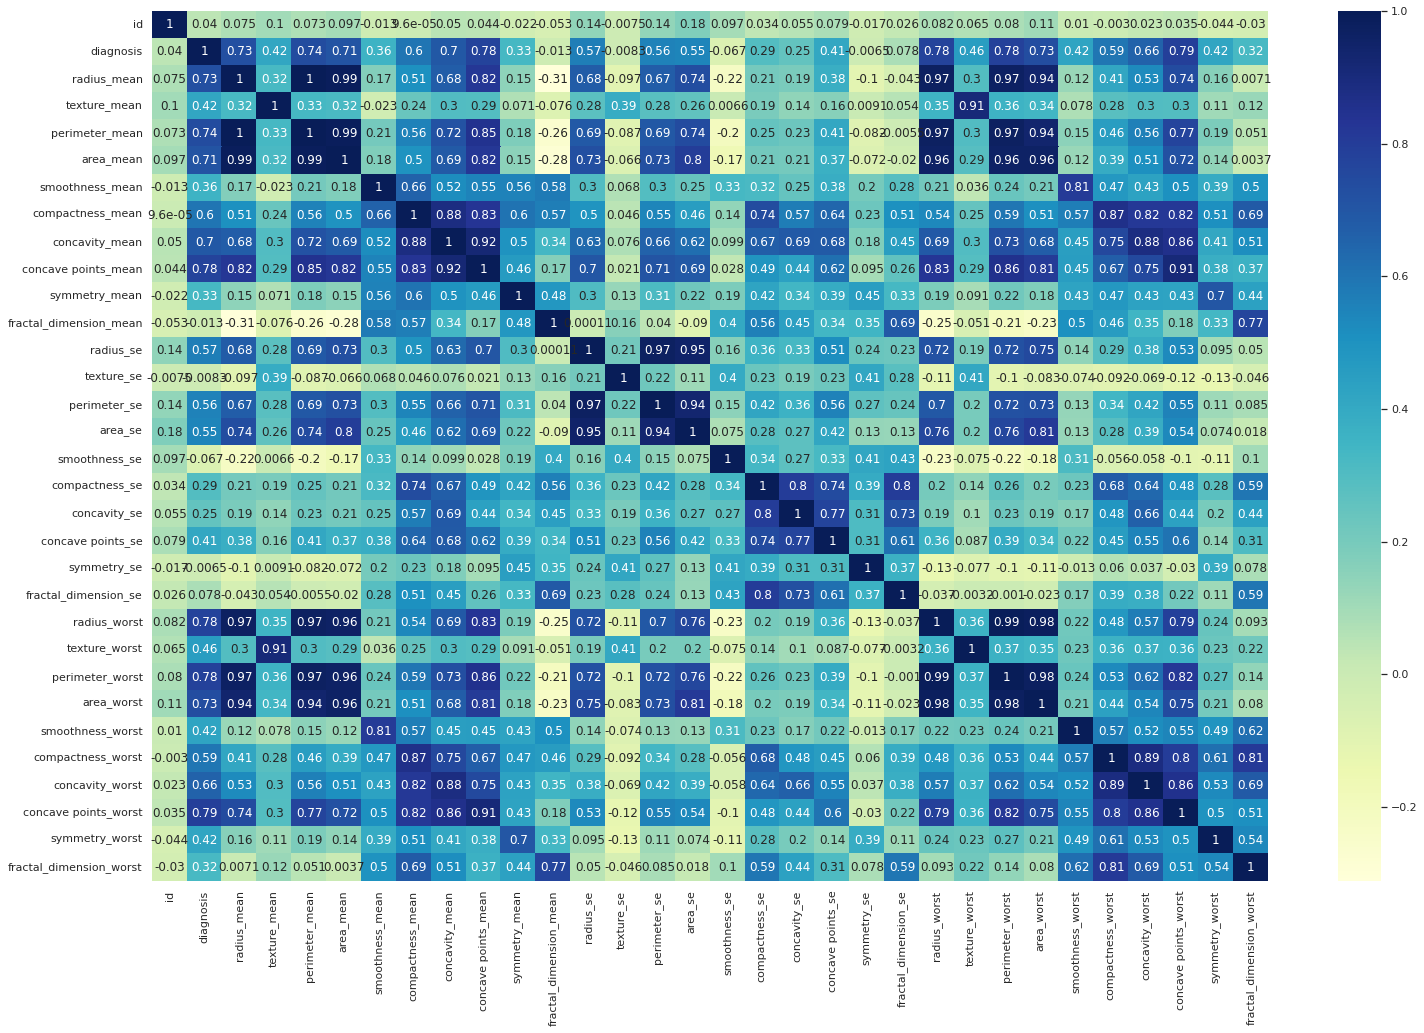

In [401]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

In [402]:
df = df.drop(["id",
              "texture_mean",
              "smoothness_mean",
              "compactness_mean",
              "symmetry_mean",
              "fractal_dimension_mean",
              "radius_se",
              "texture_se",
              "perimeter_se",
              "area_se",
              "smoothness_se",
              "compactness_se",
              "concavity_se",
              "concave points_se",
              "symmetry_se",
              "fractal_dimension_se",
              "texture_worst",
              "smoothness_worst",
              "compactness_worst",
              "concavity_worst",
              "symmetry_worst",
              "fractal_dimension_worst"], axis = 1)
df.head(1)

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.8,1001.0,0.3001,0.1471,25.38,184.6,2019.0,0.2654


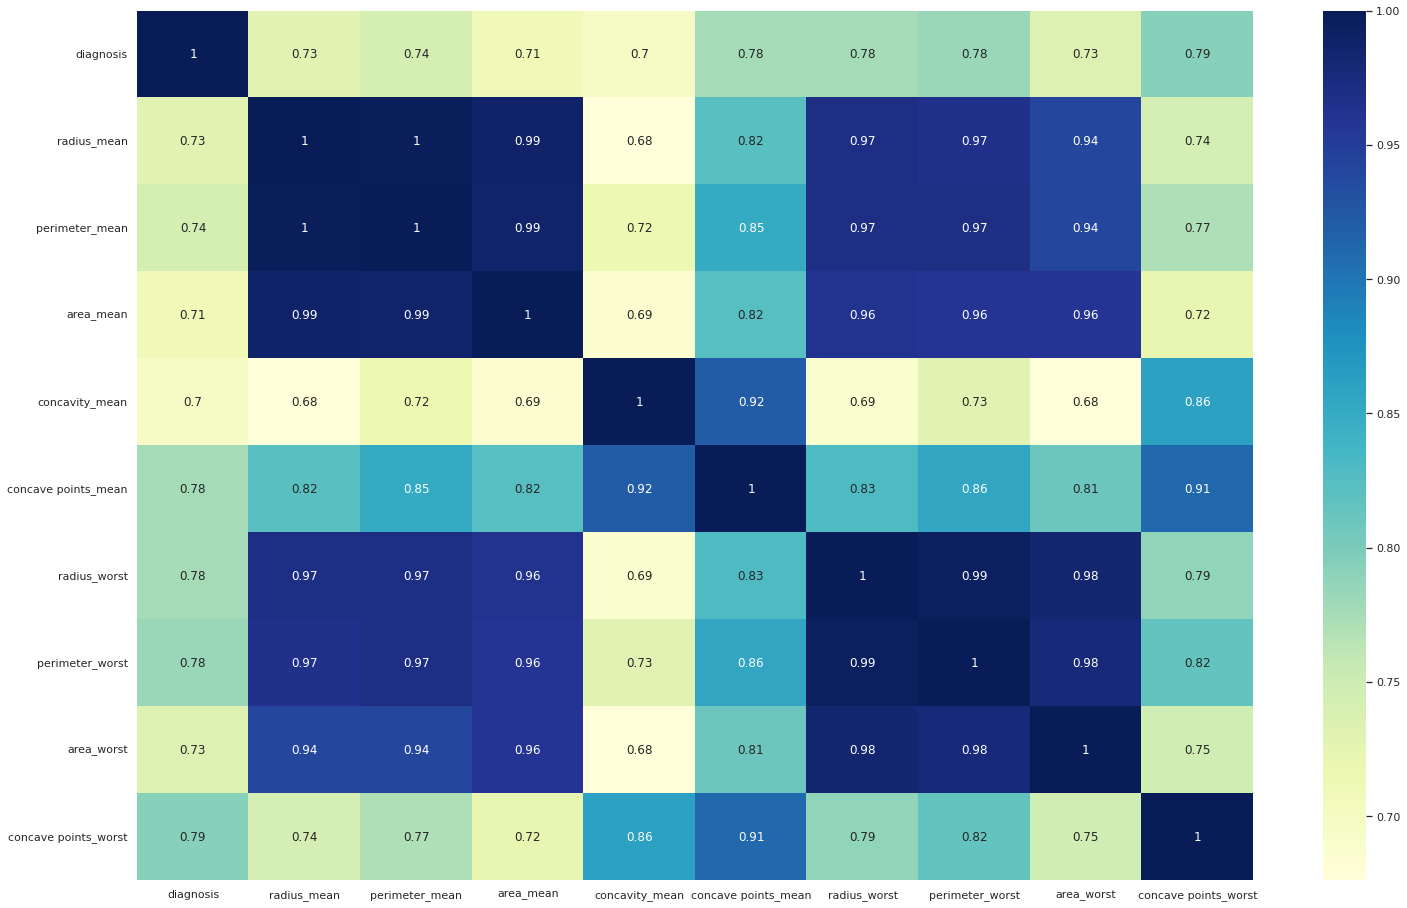

In [403]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

En esta parte lo que hicimos fue analizar columnas que no tuvieran relacion con la variable a predecir, asi como tambien cambiamos el valor de algunos variables para convertirlas en binarias.

# **Division de los datos en trainig, validating and testing:**

In [404]:
x = df.drop(["diagnosis"], axis = 1)
y = df.diagnosis

In [405]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, train_size=0.9, random_state=16)

In [406]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=16)

In [407]:
datos_n = [x_train.shape[0], x_val.shape[0], x_test.shape[0]]

In [408]:
df_mcd = pd.DataFrame({"Datos: ":["Training", "Validating", "Testing"],
                       "Registros": datos_n})
df_mcd

,Datos:,Registros
0,Training,358
1,Validating,154
2,Testing,57


En esta parte lo que hacemos es divir el data set, al principio lo dividimos en un 90% para training y un 10% para test, despues lo que hacemos es que del 30% del 90% de training lo convertimos en validating.

# **Implementacion del modelo:**

In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter= 10000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_train)

Implementamos el algoritmo de regresion logistica con un numero de iteraciones maxima de 10,000.

Accuracy for training:

In [410]:
score =accuracy_score(y_train,y_pred)
accuracy_training = score
print("Accuracy for the training set is: ", round(score*100, 4))

Accuracy for the training set is:  93.8547


Accuracy for validating:

In [411]:
y_pred = logreg.predict(x_val)
score =accuracy_score(y_val,y_pred)
accuracy_validating = score
print("Accuracy for the training set is: ", round(score*100, 4))

Accuracy for the training set is:  96.1039


Accuracy for testing

In [412]:
y_pred = logreg.predict(x_test)
score =accuracy_score(y_test,y_pred)
accuracy_testing = score
print("Accuracy for the training set is: ", round(score*100, 4))

Accuracy for the training set is:  91.2281


# **Metricas:**

Metricas del training:

In [413]:
from sklearn import metrics

y_pred = logreg.predict(x_train)
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
confusion_matrix

array([[217,   9],
       [ 13, 119]])

In [414]:
y_train.shape

(358,)

In [415]:
y_pred.shape

(358,)

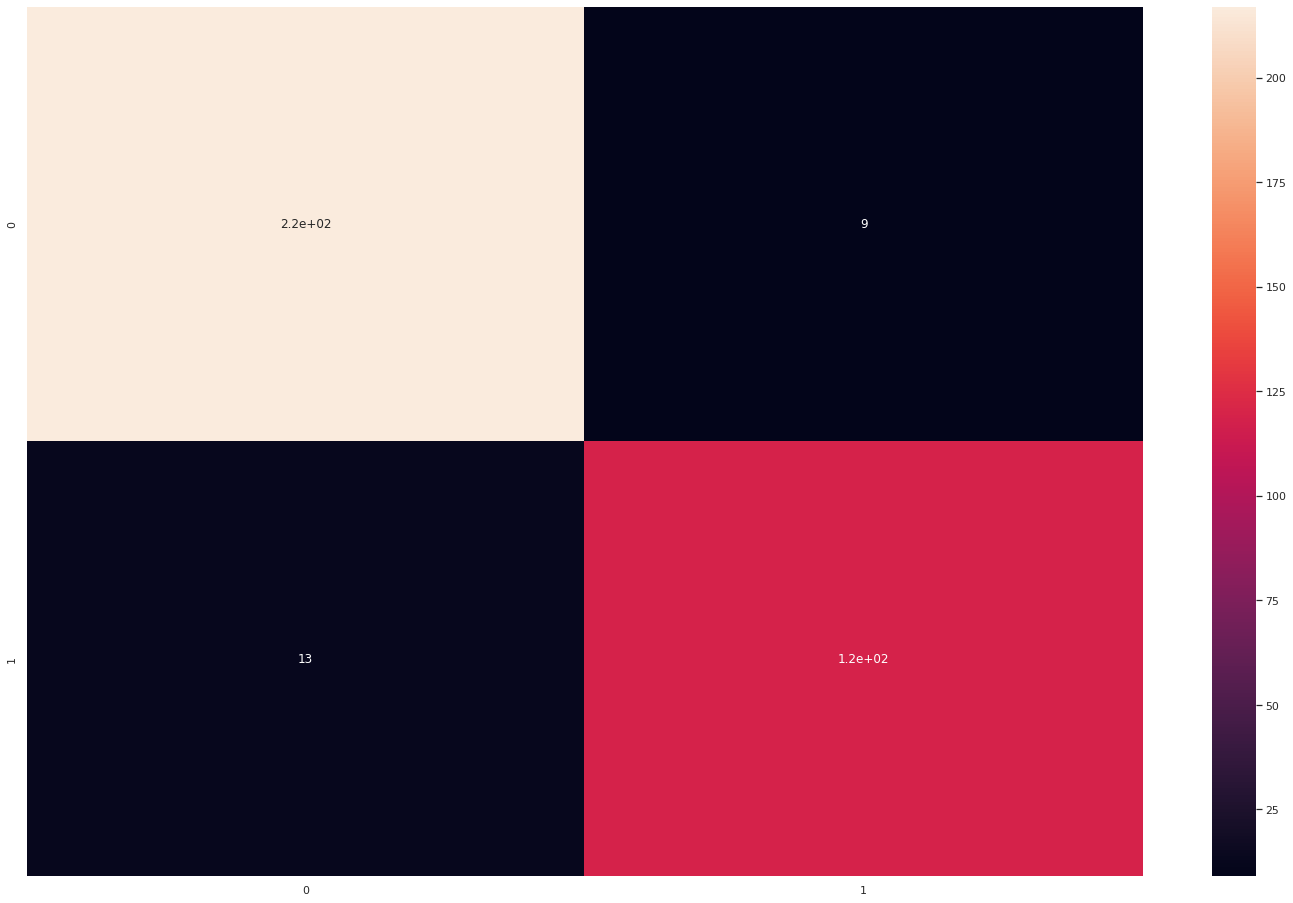

In [416]:
sns.heatmap(confusion_matrix, annot=True)

In [417]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [418]:
from sklearn.metrics import classification_report

target_names = ['Sin tumor', 'Con tumor']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Sin tumor       0.94      0.96      0.95       226
   Con tumor       0.93      0.90      0.92       132

    accuracy                           0.94       358
   macro avg       0.94      0.93      0.93       358
weighted avg       0.94      0.94      0.94       358



Metricas del validating:

In [419]:
from sklearn import metrics

y_pred = logreg.predict(x_val)
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
confusion_matrix

array([[93,  1],
       [ 5, 55]])

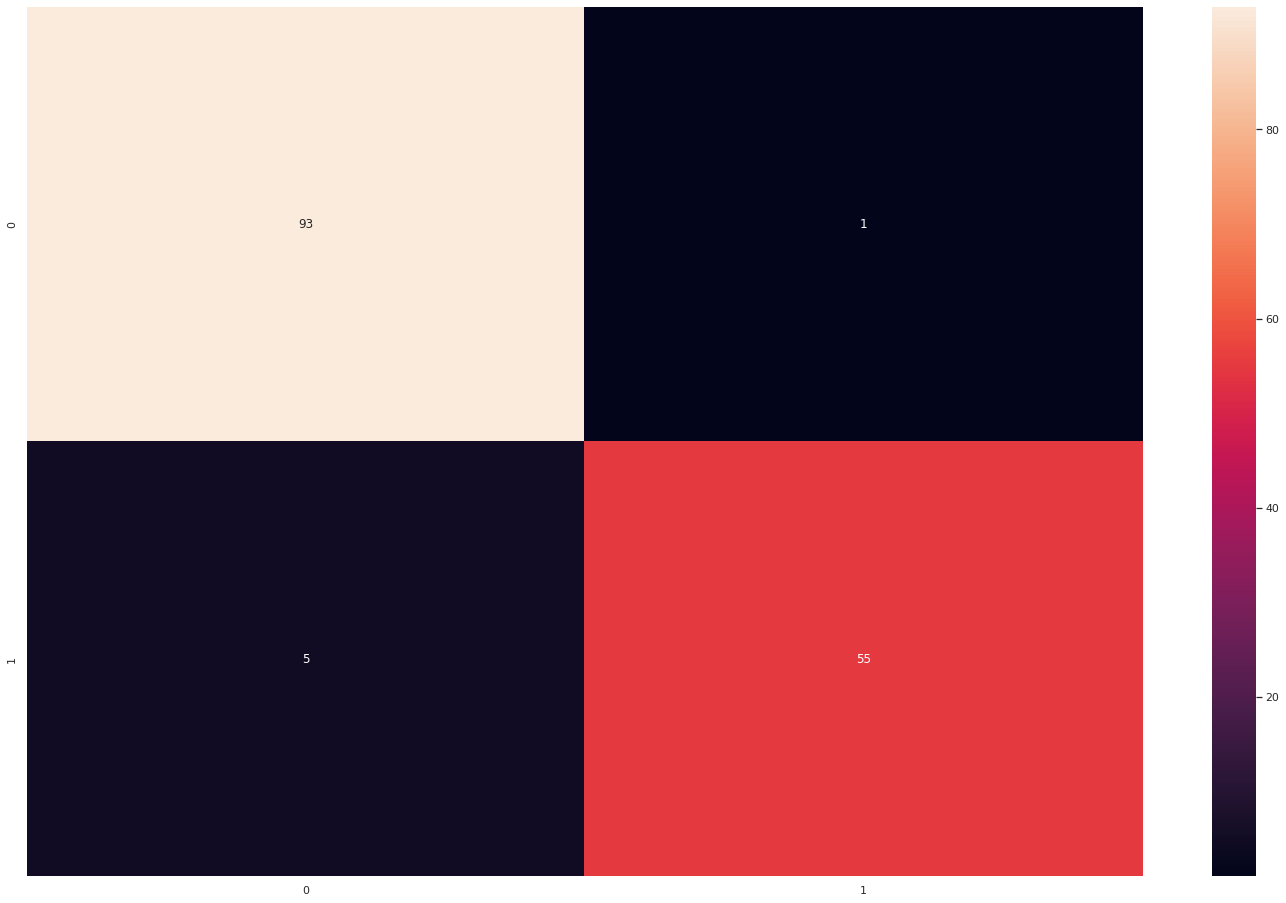

In [420]:
sns.heatmap(confusion_matrix, annot=True)

In [421]:
from sklearn.metrics import classification_report

target_names = ['Sin tumor', 'Con tumor']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Sin tumor       0.95      0.99      0.97        94
   Con tumor       0.98      0.92      0.95        60

    accuracy                           0.96       154
   macro avg       0.97      0.95      0.96       154
weighted avg       0.96      0.96      0.96       154



Metricas del testing:

In [422]:
from sklearn import metrics

y_pred = logreg.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[36,  1],
       [ 4, 16]])

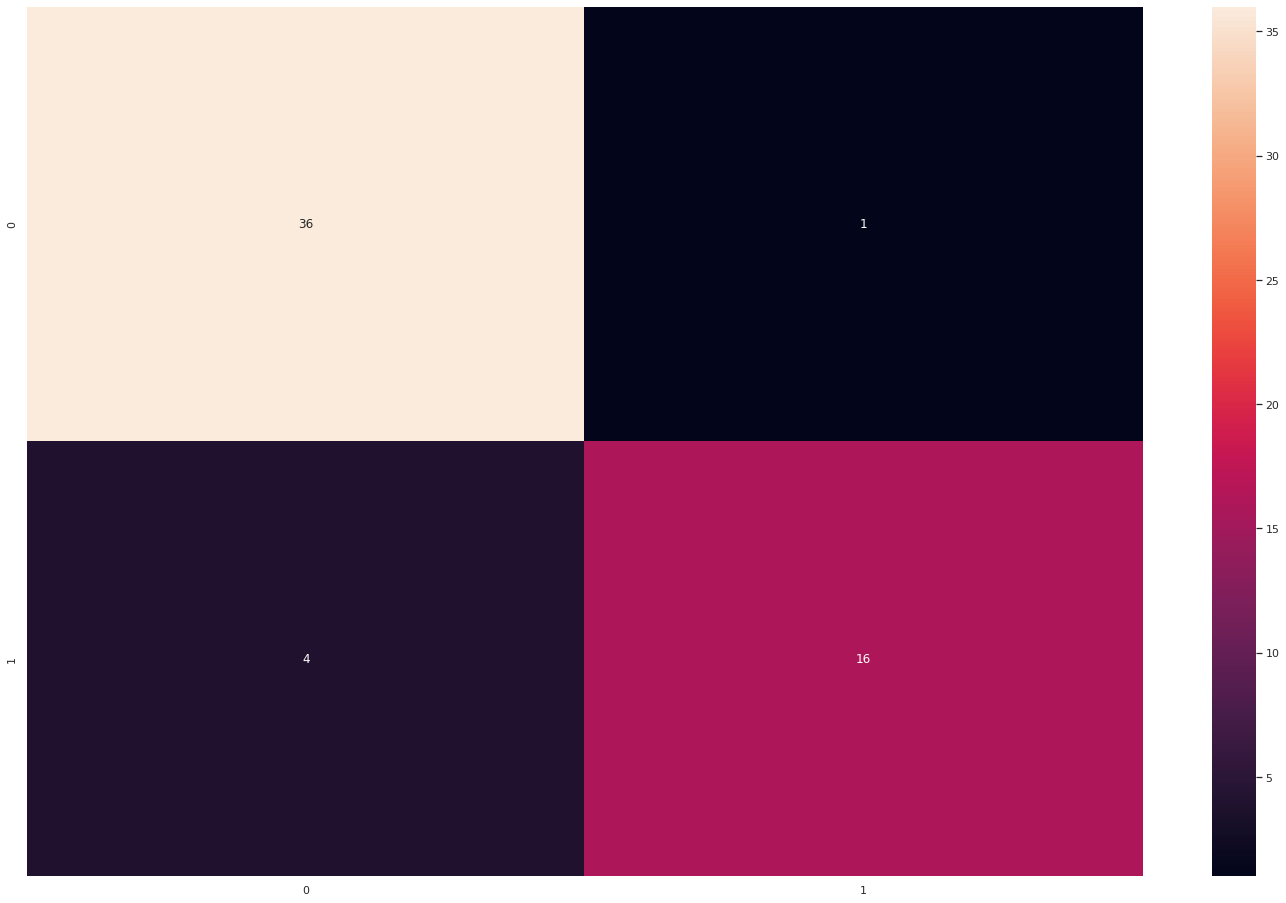

In [423]:
sns.heatmap(confusion_matrix, annot=True)

In [424]:
from sklearn.metrics import classification_report

target_names = ['Sin tumor', 'Con tumor']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Sin tumor       0.90      0.97      0.94        37
   Con tumor       0.94      0.80      0.86        20

    accuracy                           0.91        57
   macro avg       0.92      0.89      0.90        57
weighted avg       0.91      0.91      0.91        57



# **Curva ROC**

Training:

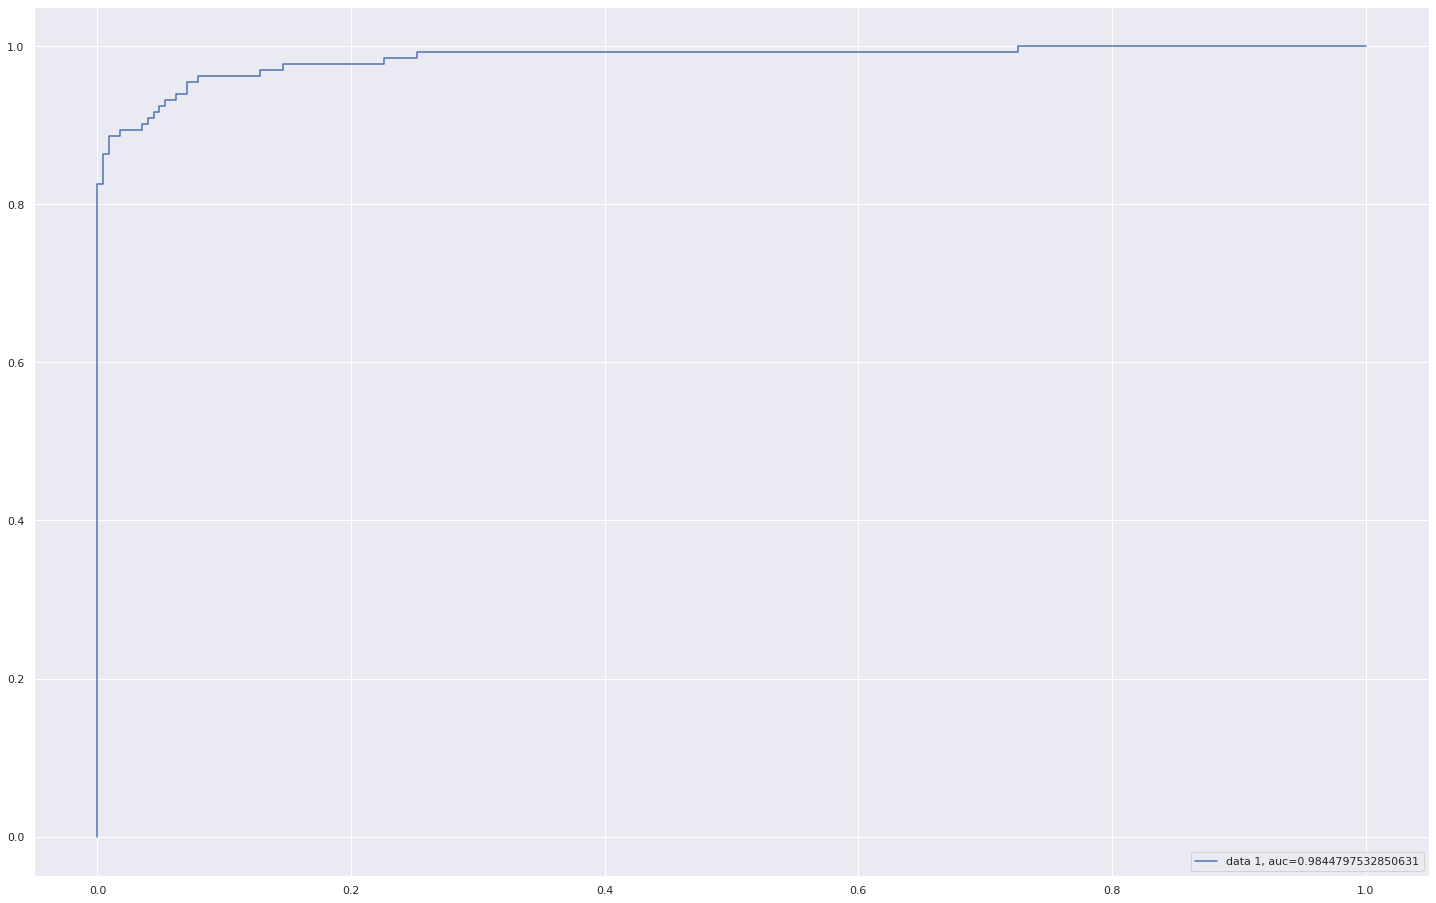

In [425]:
y_pred_proba = logreg.predict_proba(x_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
auc = metrics.roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Validating:

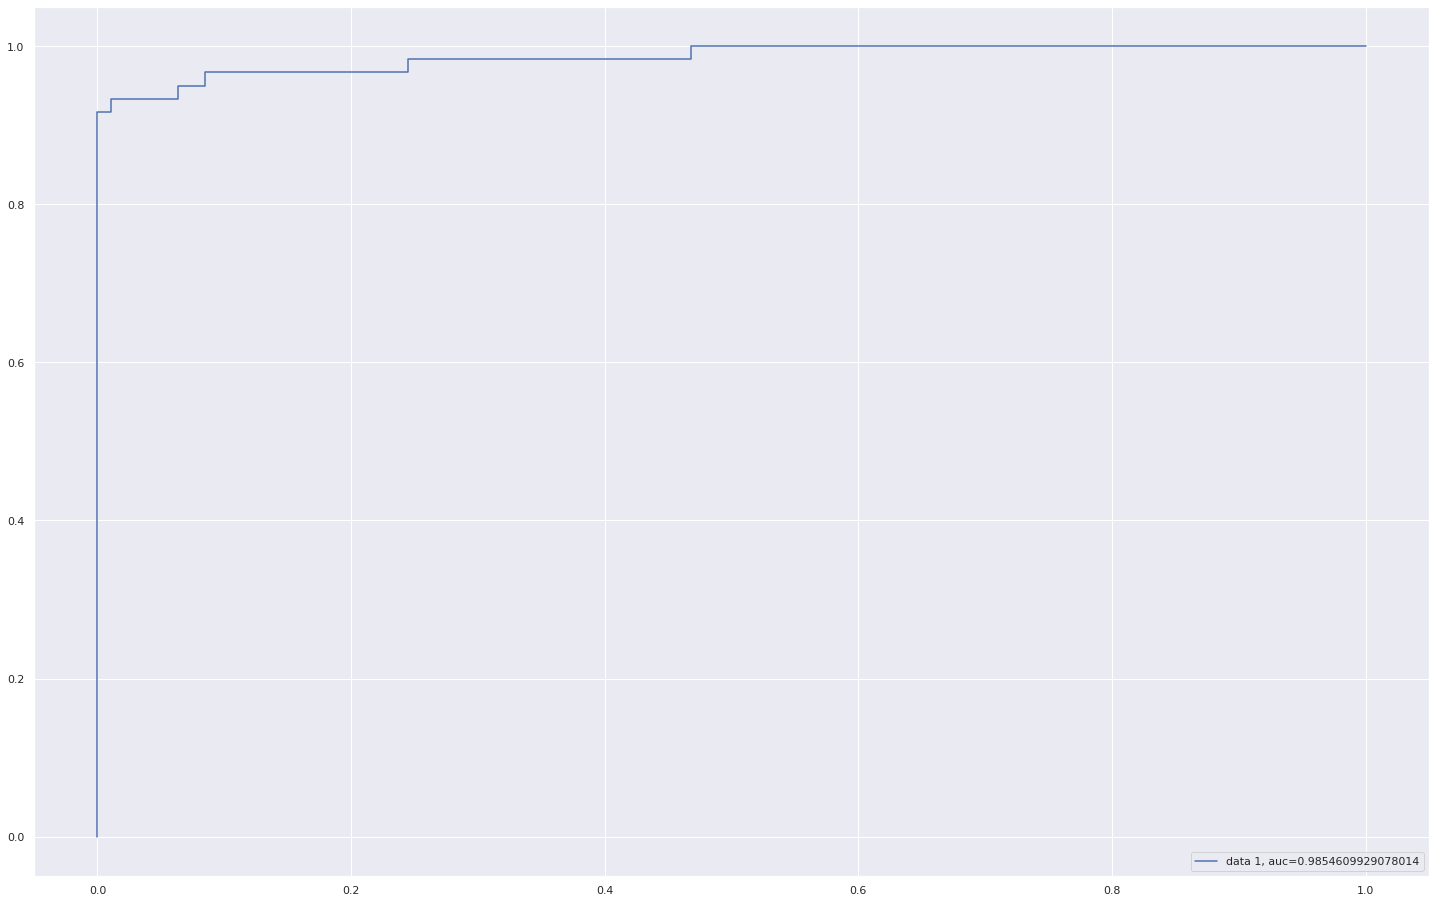

In [426]:
y_pred_proba = logreg.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Testing:

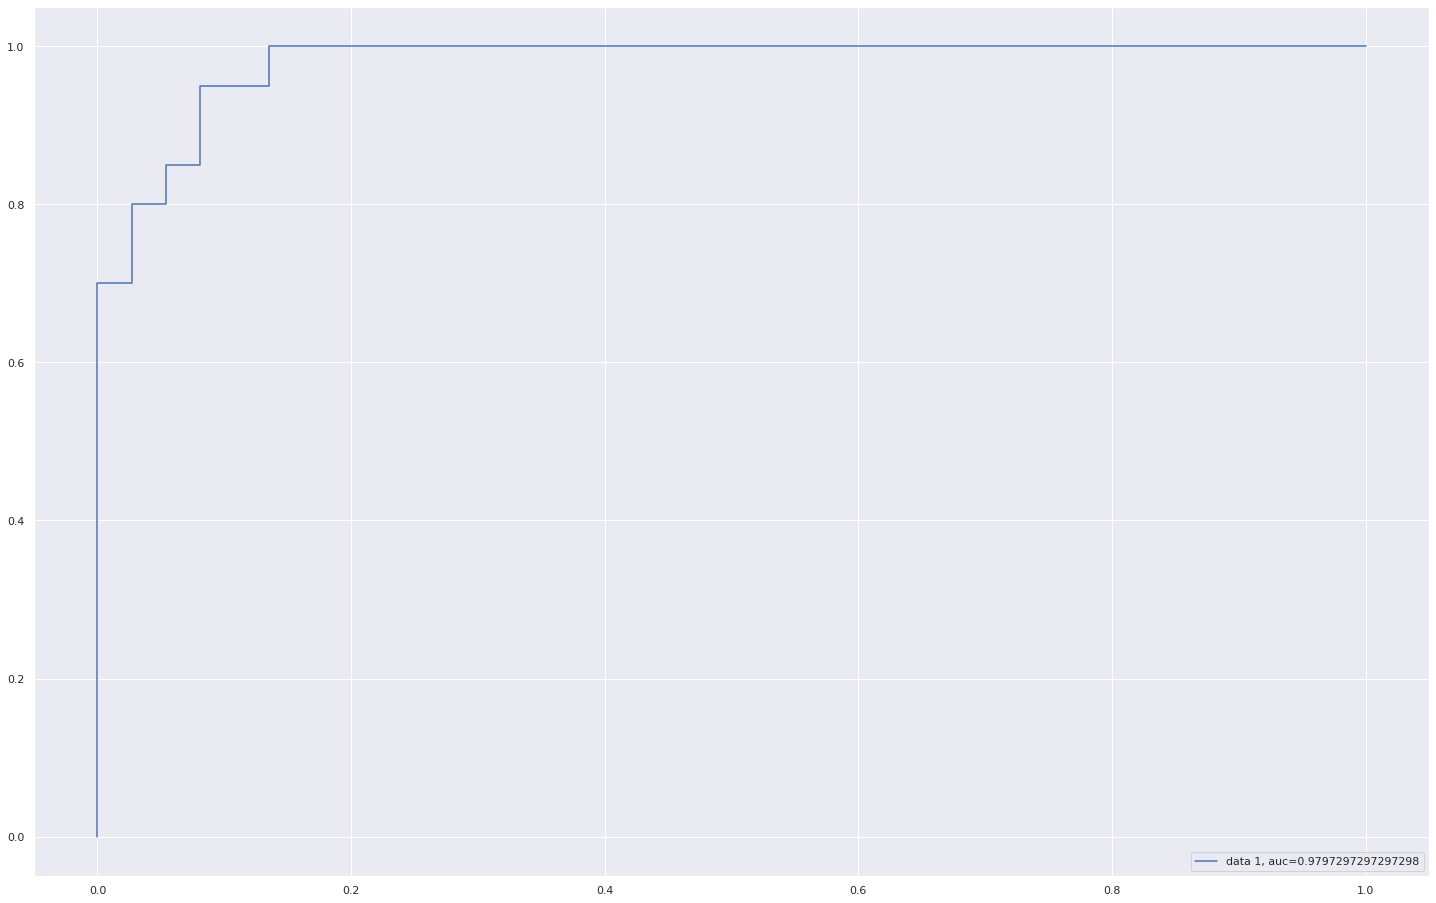

In [427]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Tenemos que decir que la curva ROC es un grafico en el que se ponen los valores positivos y falsos en cada eje, y como podemos ver dieron un muy buen accuracy en los tres datasets.

# **Tabla de accuracys:**

In [428]:
df_accuracys = pd.DataFrame({"Datos: ":["Training", "Validating", "Testing"],
                             "Registros": [accuracy_training, accuracy_validating, accuracy_testing]})
df_accuracys

,Datos:,Registros
0,Training,0.938547
1,Validating,0.961039
2,Testing,0.912281


Como podemos ver nuestro modelo dispone de muy poco error en el dataset de training y mucho menos error en el dataset de validacion, por lo que decimos que se encuentra en **balance**.

# **Predicciones:**

In [429]:
df.head(2)

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.8,1001.0,0.3001,0.14710,25.38,184.6,2019.0,0.2654
1,1,20.57,132.9,1326.0,0.0869,0.07017,24.99,158.8,1956.0,0.1860


In [430]:
"""
from sklearn.datasets import make_blobs
x_pred, _ = make_blobs(n_samples=5, centers=2, n_features=25, random_state=1)
y_pred = logreg.predict(x_pred)
for i in range(len(x_pred)):
  print("X=%s, Prediccion=%s" % (x_pred[i], y_pred[i]))
"""

'\nfrom sklearn.datasets import make_blobs\nx_pred, _ = make_blobs(n_samples=5, centers=2, n_features=25, random_state=1)\ny_pred = logreg.predict(x_pred)\nfor i in range(len(x_pred)):\n  print("X=%s, Prediccion=%s" % (x_pred[i], y_pred[i]))\n'

In [431]:
 l = np.random.randint(low=0, high=52)
 x_pred = x_test[l:l+5]

In [432]:
y_pred = logreg.predict(x_pred)

In [433]:
y_pred

array([1, 0, 0, 0, 1])

In [434]:
pd.DataFrame({"Numero de prediccion":["1", "2", "3", "4", "5"],
              "Prediccion":y_pred})

,Numero de prediccion,Prediccion
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
